In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [7]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [8]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [9]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [10]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [11]:
# Find the most recent date in the data set.
most_recent = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
most_recent

('2017-08-23',)

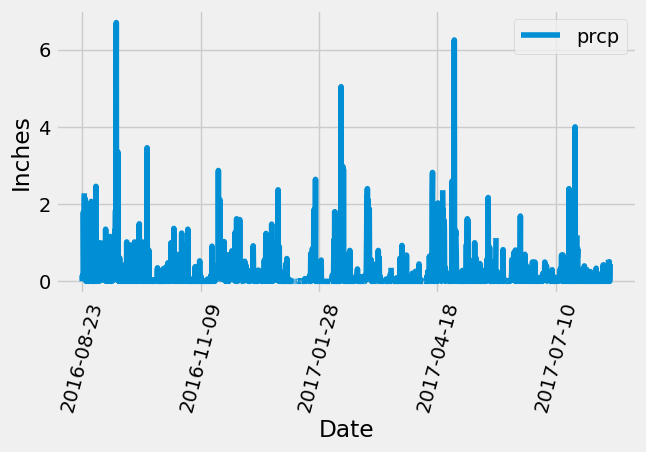

In [16]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
last_12 = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date > '2016-08-22').\
    order_by(Measurement.date).all()
# Calculate the date one year from the last date in data set.


# Perform a query to retrieve the data and precipitation scores


# Save the query results as a Pandas DataFrame. Explicitly set the column names
last_12_df = pd.DataFrame(last_12).set_index('date')
last_12_df


# Sort the dataframe by date


# Use Pandas Plotting with Matplotlib to plot the data
last_12_df.plot()
plt.xticks(rotation=75)
plt.tight_layout()
plt.xlabel('Date')
plt.ylabel('Inches')
plt.show()

In [17]:
# Use Pandas to calculate the summary statistics for the precipitation data
last_12_df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [18]:
# Design a query to calculate the total number of stations in the dataset
stations_total = session.query(Station.station).count()
stations_total

9

In [22]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
most_stations = session.query(Measurement.station, func.count(Measurement.station)).\
    order_by(func.count(Measurement.station).desc()).\
    group_by(Measurement.station).all()
most_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [29]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
# 'USC00519281'
temp_values = session.query(Measurement.tobs, func.avg(Measurement.tobs), 
                            func.max(Measurement.tobs), func.min(Measurement.tobs)).\
    filter(Measurement.station == 'USC00519281').all()
temp_values

[(54.0, 71.66378066378067, 85.0, 54.0)]

Text(0, 0.5, 'Frequency')

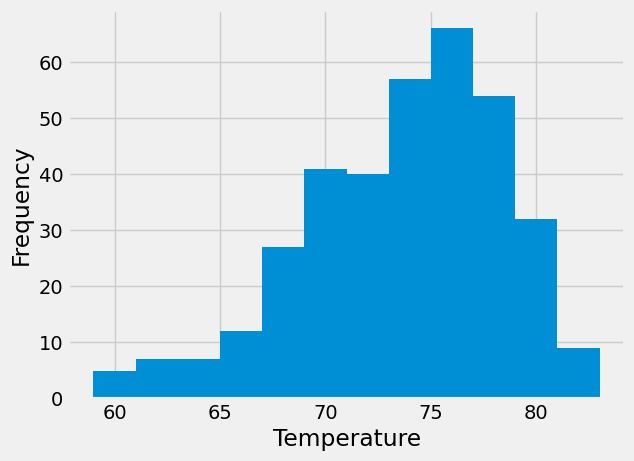

In [63]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
# most recent date for most active station
most_active_date = session.query(Measurement.date).order_by(Measurement.date.desc()).\
    filter(Measurement.station == 'USC00519281').first()
most_active_date

# get values for last 12 months
active_12 = session.query(Measurement.date, Measurement.tobs).\
    filter(Measurement.station == 'USC00519281').\
    filter(Measurement.date > '2016-08-17').all()

# put into pandas df with only temp data in order to plot
active_12_df = pd.DataFrame(active_12)['tobs']
active_12_df
# plot histogram
active_12_df.hist(bins=12)
plt.xlabel('Temperature')
plt.ylabel('Frequency')


# Close Session

In [64]:
# Close Session
session.close()